In [3]:
#data essentials
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy

#self created tools
from getting_data import *
from Indicators import *
from y_engineering import *
from metric import *
from models import *
from utils import *

# PyTorch model and training necessities
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

#sklearn
from sklearn.metrics import *

#visualisation with tensorboard
from torch.utils.tensorboard import SummaryWriter

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
#use gpu if available
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    device = "cuda"

In [6]:
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]

# getting raw data
data = {}
for ticker in tickers:
    raw_path = "/home/jack/Desktop/Programming/tr_bot/data/train/" + ticker + "_train.csv"
    data[ticker] = pd.read_csv(raw_path)

In [7]:
# addig some features
#df['y_binary_sma4'] = (sma(df, period=4, column='Adj Close').shift(periods=-4) > df['Adj Close']).astype(int)
# df["ema_pct_20"] = pct_log(df, y_col='ema_20', time_to_pred = 1, pct=True, log=False)
# df["ema_pct_200"] = pct_log(df, y_col='ema_200', time_to_pred = 1, pct=True, log=False)

In [8]:
data[tickers[4]]

,Date,Open,High,Low,Close,Adj Close,Volume,pct,pct_log,ema_20,ema_50,ema_200,ema_pct_20,ema_pct_50,ema_pct_200,rsi_20,y_binary_sma4
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000,NaN,NaN,0.062823,0.062823,0.062823,NaN,NaN,NaN,NaN,0
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200,0.017255,-0.006182,0.063392,0.063376,0.063368,0.009059,0.008800,0.008671,NaN,0
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400,-0.025443,0.009371,0.062984,0.062996,0.063002,-0.006436,-0.005990,-0.005774,NaN,0
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400,-0.017389,0.006319,0.062468,0.062519,0.062544,-0.008187,-0.007570,-0.007266,NaN,0
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059574,58435200,-0.026537,0.009627,0.061768,0.061882,0.061938,-0.011208,-0.010191,-0.009689,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,2021-04-07,247.809998,250.929993,247.190002,249.899994,245.472717,22719800,0.008230,0.001492,234.537831,230.417240,211.750363,0.004932,0.002674,0.001603,0.117034,1
8838,2021-04-08,252.770004,254.139999,252.000000,253.250000,248.763367,23625200,0.013405,0.002420,235.892644,231.136696,212.118651,0.005777,0.003122,0.001739,0.137510,1
8839,2021-04-09,252.869995,255.990005,252.440002,255.850006,251.317322,24326800,0.010267,0.001852,237.361661,231.928093,212.508688,0.006227,0.003424,0.001839,0.152681,1
8840,2021-04-12,254.710007,257.670013,254.619995,255.910004,251.376266,27148700,0.000235,0.000042,238.696385,232.690766,212.895430,0.005623,0.003288,0.001820,0.153034,1


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        1.300e+01, 3.600e+01, 1.730e+02, 1.764e+03, 1.952e+03, 1.790e+02,
        3.800e+01, 1.200e+01, 8.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00]),
 array([-0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
        -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
         0.08,  0.09,  0.1 ]),
 <BarContainer object of 20 artists>)

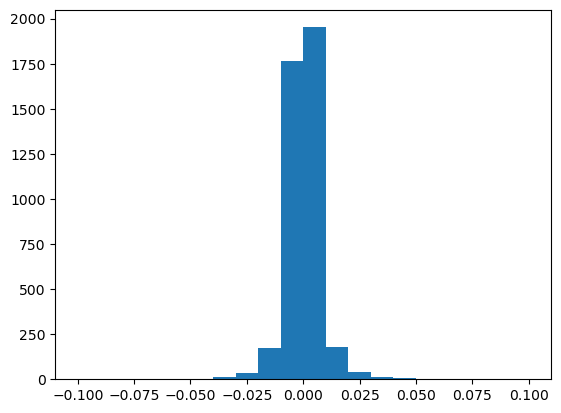

In [9]:
plt.hist(data[tickers[2]]["pct_log"], bins=20, range=(-0.1,0.1))

In [10]:
data[tickers[0]]["pct_log"].mean()

0.02648532590561872

In [11]:
#getting data for only one stock

# temp = get_xy(df, 14, x_col = ["pct_log"], y_col='y_binary_sma5', val_pct=0.2, period_to_skip=40)
# x_train, y_train, x_val, y_val = convert_to_tensor(temp)

# ind = get_xy(df, 14, x_col = ['ema_pct_21',"ema_pct_200", "rsi_20"], y_col='y_binary_sma5', val_pct=0.2, period_to_skip=40)
# ind_train, _, ind_val, _ = convert_to_tensor(ind)

In [12]:
#getting data for many stocks

def get_concatenated_xy(data, period=14, x_cols = [["pct_log"], ['ema_pct_20',"ema_pct_200", "rsi_20"]], y_col='y_binary_sma4', val_pct=0.2, period_to_skip=40):
    """
    takes in a dictionary data of all the different stocks and returns a concatenated form
    """
    
    x_train_concatenated = [ [] for _ in range(len(x_cols)) ]
    x_val_concatenated = [ [] for _ in range(len(x_cols)) ]
    y_train_concatenated = []
    y_val_concatenated = []
    
    for key, df in data.items():
        for i, x_col in enumerate(x_cols):
            temp = get_xy(df, period, x_col = x_col, y_col=y_col, val_pct=val_pct, period_to_skip=period_to_skip)
            x_train, y_train, x_val, y_val = convert_to_tensor(temp)
            
            x_train_concatenated[i].append(x_train)
            x_val_concatenated[i].append(x_val)
            
            
            if i == 0:
                y_train_concatenated.append(y_train)
                y_val_concatenated.append(y_val)
                
    return [torch.cat(x) for x in x_train_concatenated], [torch.cat(x) for x in x_val_concatenated], torch.cat(y_train_concatenated), torch.cat(y_val_concatenated)

In [13]:
x_train, x_val, y_train, y_val = get_concatenated_xy(data)

In [14]:
x_train[0].shape, x_train[1].shape, y_train.shape, y_val.shape

(torch.Size([25508, 1, 14]),
 torch.Size([25508, 3, 14]),
 torch.Size([25508, 1]),
 torch.Size([6441, 1]))

In [15]:
#turning data into a dataloader

batch_size = 64
x_train_ds = CustomDataset(x_train, y_train)
x_val_ds = CustomDataset(x_val, y_val)
train_dataloader = DataLoader(x_train_ds, batch_size=batch_size, shuffle=True, generator=torch.Generator(device=device))
val_dataloader = DataLoader(x_val_ds, batch_size=batch_size, shuffle=True, generator=torch.Generator(device=device))

In [16]:
x_train_ds.Xs[1].size()

torch.Size([25508, 3, 14])

In [17]:
# some debugging to check where the nan values are
for i in range(3969):
    if x_train_ds.Xs[1][i:,:,:].isnan().sum()> 0:
        print(i)
        print(x_train_ds.Xs[1][i:,:,:])

In [18]:
#checking data shapes

temp = next(iter(train_dataloader))
len(temp), temp[0].shape, temp[1].shape, temp[2].shape

(3, torch.Size([64, 1, 14]), torch.Size([64, 3, 14]), torch.Size([64, 1]))

In [19]:
class indicator_cnn(nn.Module):
    """
    basic indicator model with 2 seperate cnn that that takes price and some indicators as input respectively. They both branch into a few common fully connected layers
    
    It is configured for hyper parameter tuning
    
    """
    
    
    def __init__(self, hyper_parameters={}):
        super(indicator_cnn, self).__init__()
        
        # direct price input layers
        # self.x_padding = nn.ConstantPad1d((0,2), 0)# we only want to pad the right because the earlier data is not as important
        self.x_conv1 = nn.Conv1d(in_channels=1, out_channels=6, kernel_size=5, stride=2)
        self.x_conv2 = nn.Conv1d(6, 16, 3, 1)
        self.x_conv3 = nn.Conv1d(16, 24, 1)
        
        # indicators input layers
        # self.ind_padding = nn.ConstantPad1d((0,2), 0) # we only want to pad the right because the earlier data is not as important
        self.ind_conv1 = nn.Conv1d(in_channels=3, out_channels=6, kernel_size=5, stride=3)
        self.ind_conv2 = nn.Conv1d(6, 12, 3, 1)
        # self.ind_conv3 = nn.Conv1d(12, 16, 1, 1)
        
        #rnn layers
        self.rnn = nn.LSTM(input_size=96, hidden_size=32, num_layers=2, dropout=0.2)
        
        #combined layers
        self.fc1 = nn.LazyLinear(40)
        self.fc2 = nn.Linear(40, 20)
        self.fc3 = nn.Linear(20, 1)
    
    def forward(self, x, ind):

        # x = self.x_padding(x)
        x = F.relu(self.x_conv1(x))
        # x = nn.Dropout(0.2)(x)
        x = F.relu(self.x_conv2(x))
        x = nn.Dropout(0.2)(x)
        x = F.relu(self.x_conv3(x))
        # x = nn.Dropout(0.2)(x)
        x = x.view(-1, self.num_flat_features(x))
        
        # ind = self.ind_padding(ind)
        ind = F.relu(self.ind_conv1(ind))
        ind = nn.Dropout(0.2)(ind)
        ind = F.relu(self.ind_conv2(ind))
        # ind = nn.Dropout(0.2)(ind)
        # ind = F.relu(self.ind_conv3(ind))
        # ind = nn.Dropout(0.2)(ind)
        ind = ind.view(-1, self.num_flat_features(ind))
        
        combined = torch.cat((x, ind),1)
        combined = F.relu(self.fc1(combined))
        combined = F.relu(self.fc2(combined))
        combined = self.fc3(combined)
        
        return combined
    
    def predict(self, X, return_logits=True, threshold = 0.5):
        logits = torch.sigmoid(self.forward(*X).cpu().detach())
        if return_logits:
            return logits.numpy()
        return (logits > threshold).astype("int")
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
    def count_parameters(self):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)
    

model = indicator_cnn().cuda()

/home/jack/anaconda3/envs/trading_environment/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [20]:
#dry run to initialise lazy modules
model(*next(iter(train_dataloader))[:-1])

tensor([[0.0830],
        [0.0821],
        [0.0810],
        [0.0856],
        [0.0827],
        [0.0820],
        [0.0818],
        [0.0825],
        [0.0816],
        [0.0827],
        [0.0794],
        [0.0813],
        [0.0860],
        [0.0829],
        [0.0823],
        [0.0847],
        [0.0816],
        [0.0839],
        [0.0819],
        [0.0810],
        [0.0807],
        [0.0845],
        [0.0811],
        [0.0826],
        [0.0851],
        [0.0804],
        [0.0819],
        [0.0837],
        [0.0810],
        [0.0811],
        [0.0802],
        [0.0861],
        [0.0796],
        [0.0837],
        [0.0830],
        [0.0818],
        [0.0851],
        [0.0829],
        [0.0813],
        [0.0822],
        [0.0837],
        [0.0835],
        [0.0835],
        [0.0856],
        [0.0840],
        [0.0858],
        [0.0808],
        [0.0834],
        [0.0826],
        [0.0813],
        [0.0842],
        [0.0868],
        [0.0800],
        [0.0819],
        [0.0827],
        [0

In [21]:
#len(next(iter(train_dataloader))[:-1])

In [22]:
model.count_parameters()

30881

In [23]:
print(model)

indicator_cnn(
  (x_conv1): Conv1d(1, 6, kernel_size=(5,), stride=(2,))
  (x_conv2): Conv1d(6, 16, kernel_size=(3,), stride=(1,))
  (x_conv3): Conv1d(16, 24, kernel_size=(1,), stride=(1,))
  (ind_conv1): Conv1d(3, 6, kernel_size=(5,), stride=(3,))
  (ind_conv2): Conv1d(6, 12, kernel_size=(3,), stride=(1,))
  (rnn): LSTM(96, 32, num_layers=2, dropout=0.2)
  (fc1): Linear(in_features=96, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


In [24]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas = (0.9, 0.999), weight_decay=1e-5)
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)

In [25]:
# using tensorboard visualisation tool
# To view, start TensorBoard on the command line with:
#tensorboard --logdir=runs
#and open a browser tab to http://localhost:6006/
from datetime import datetime

writer = SummaryWriter('runs/indicator_cnn_LSTM_dropout')
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

In [26]:
# debugging each individual layers
def printnorm(self, input, output):
    # input is a tuple of packed inputs
    # output is a Tensor. output.data is the Tensor we are interested
    print('Inside ' + self.__class__.__name__ + ' forward')
    print('')
    print('input: ', type(input))
    print('input[0]: ', type(input[0]))
    print('output: ', type(output))
    print('')
    print('input size:', input[0].size())
    print('output size:', output.data.size())
    print('how many nan value:', torch.sum(torch.isnan(output.data)))

In [27]:
# register hooks to look at outputs for debugging

# model.x_conv3.register_forward_hook(printnorm)
# model.ind_conv2.register_forward_hook(printnorm)
# model.fc1.register_forward_hook(printnorm)

In [28]:
#model(*next(iter(train_dataloader))[:-1])

In [66]:
#training
start = 0
epochs = 30

for t in range(start, epochs):
    print(f"Epoch {t+1} ------------------------>  ", end='')
    avg_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    avg_vloss, correct = test_loop(val_dataloader, model, loss_fn, batch_size=64)
    
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    t + 1)
    writer.flush()
print("Done!")

Epoch 1 ------------------------>  Avg training loss: 0.010797, Avg val loss: 0.010721, Validation accuracy: 58.6% 

Epoch 2 ------------------------>  Avg training loss: 0.010796, Avg val loss: 0.010699, Validation accuracy: 58.6% 

Epoch 3 ------------------------>  Avg training loss: 0.010798, Avg val loss: 0.010740, Validation accuracy: 58.6% 

Epoch 4 ------------------------>  Avg training loss: 0.010797, Avg val loss: 0.010723, Validation accuracy: 58.6% 

Epoch 5 ------------------------>  Avg training loss: 0.010795, Avg val loss: 0.010721, Validation accuracy: 58.6% 

Epoch 6 ------------------------>  Avg training loss: 0.010794, Avg val loss: 0.010737, Validation accuracy: 58.6% 

Epoch 7 ------------------------>  Avg training loss: 0.010797, Avg val loss: 0.010732, Validation accuracy: 58.6% 

Epoch 8 ------------------------>  Avg training loss: 0.010793, Avg val loss: 0.010712, Validation accuracy: 58.6% 

Epoch 9 ------------------------>  Avg training loss: 0.010794, 

In [67]:
logits = model.predict(x_val)
metric = anlayse_binary(logits, y_val.cpu().detach().numpy().astype("int"))

In [31]:
len(logits)

6441

In [32]:
x_val[0].size()

torch.Size([6441, 1, 14])

In [33]:
y_val

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]])

(array([ 928.,  731.,  633.,  765.,  891., 1188.,  954.,  285.,   56.,
          10.]),
 array([0.52104825, 0.52355009, 0.52605194, 0.52855378, 0.53105563,
        0.53355753, 0.53605938, 0.53856122, 0.54106307, 0.54356492,
        0.54606676]),
 <BarContainer object of 10 artists>)

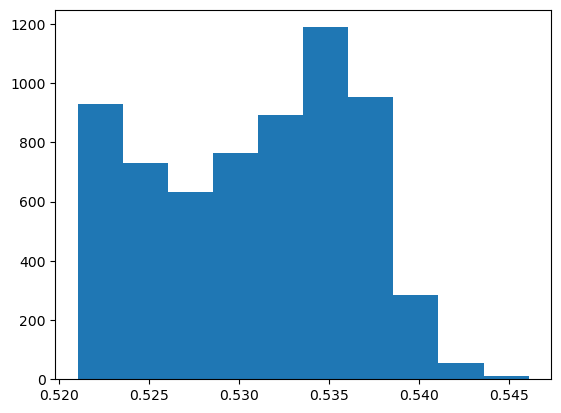

In [34]:
plt.hist(logits)

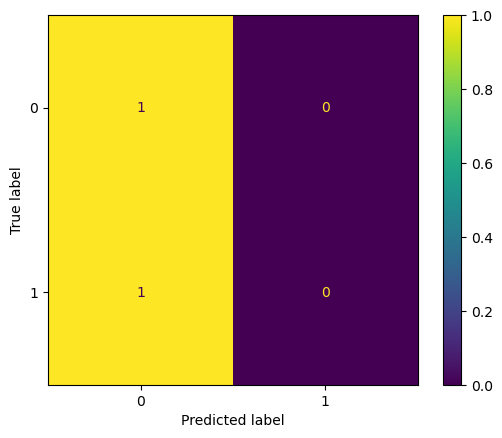

              precision    recall  f1-score   support

           0       0.41      1.00      0.59      2668
           1       0.00      0.00      0.00      3773

    accuracy                           0.41      6441
   macro avg       0.21      0.50      0.29      6441
weighted avg       0.17      0.41      0.24      6441



/home/jack/anaconda3/envs/trading_environment/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jack/anaconda3/envs/trading_environment/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jack/anaconda3/envs/trading_environment/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [35]:
metric.binarise(0.55)
metric.show_cf()

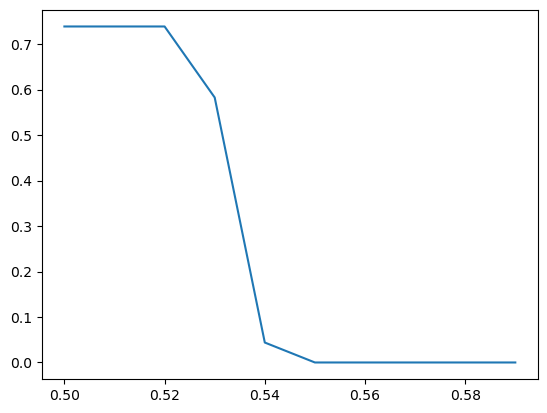

In [37]:
metric.graph_metric("f1-score")

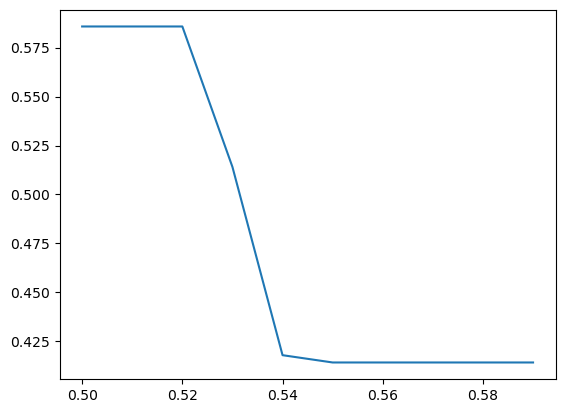

In [38]:
metric.graph_metric("accuracy")

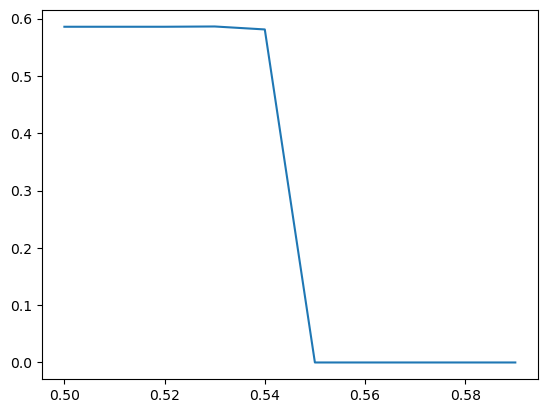

In [39]:
metric.graph_metric("precision")

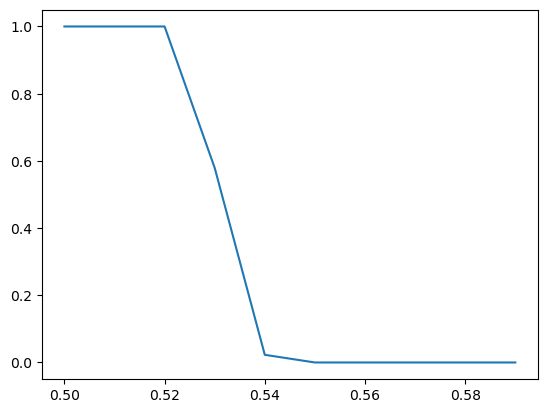

In [40]:
metric.graph_metric("recall")

In [41]:
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]

# getting test data
test_data = {}
for ticker in tickers:
    raw_path = "/home/jack/Desktop/Programming/tr_bot/data/test/" + ticker + "_test.csv"
    test_data[ticker] = pd.read_csv(raw_path)

In [42]:
test_data["AMZN"]

,Date,Open,High,Low,Close,Adj Close,Volume,pct,pct_log,ema_20,ema_50,ema_200,ema_pct_20,ema_pct_50,ema_pct_200,rsi_20,y_binary_sma4
0,2021-04-14,170.201996,170.206497,166.300003,166.649994,166.649994,62904000,-0.019706,-0.003875,161.137175,159.211341,151.843795,0.003614,0.001911,0.000981,0.094686,1
1,2021-04-15,168.550003,169.850006,167.600006,168.954498,168.954498,64672000,0.013828,0.002685,161.881682,159.593426,152.014051,0.004620,0.002400,0.001121,0.117817,0
2,2021-04-16,169.000000,170.339996,167.779495,169.972000,169.972000,63720000,0.006022,0.001171,162.652188,160.000429,152.192737,0.004760,0.002550,0.001175,0.127692,0
3,2021-04-19,169.516495,171.796494,168.007996,168.600494,168.600494,54508000,-0.008069,-0.001578,163.218694,160.337686,152.355998,0.003483,0.002108,0.001073,0.105494,0
4,2021-04-20,168.679993,169.149506,165.800003,166.734497,166.734497,52460000,-0.011068,-0.002170,163.553532,160.588541,152.499068,0.002051,0.001565,0.000939,0.076306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300,0.012647,0.002717,98.251701,97.136286,107.923224,0.005427,0.002592,-0.000431,0.099754,0
496,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700,-0.008520,-0.001845,98.647730,97.343099,107.868366,0.004031,0.002129,-0.000508,0.082690,0
497,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500,0.015038,0.003224,99.152707,97.602193,107.829377,0.005119,0.002662,-0.000361,0.103473,0
498,2023-04-05,103.910004,103.910004,100.750000,101.099998,101.099998,45175400,-0.027417,-0.005986,99.338164,97.739362,107.762418,0.001870,0.001405,-0.000621,0.050102,0


In [43]:
def get_concatenated_xy_test(data, period=14, x_cols = [["pct_log"], ['ema_pct_20',"ema_pct_200", "rsi_20"]], test_col='Close', val_pct=0.2, period_to_skip=40):
    """
    takes in a dictionary data of all the different stocks and returns a concatenated form
    """
    
    x_train_concatenated = [ [] for _ in range(len(x_cols)) ]
    x_val_concatenated = [ [] for _ in range(len(x_cols)) ]
    y_train_concatenated = []
    y_val_concatenated = []

    for i, x_col in enumerate(x_cols):
        temp = get_xy(data, period, x_col = x_col, y_col=test_col, val_pct=val_pct, period_to_skip=period_to_skip)
        x_train, y_train, x_val, y_val = convert_to_tensor(temp)

        x_train_concatenated[i].append(x_train)
        x_val_concatenated[i].append(x_val)


        if i == 0:
            y_train_concatenated.append(y_train)
            y_val_concatenated.append(y_val)
                
    return [torch.cat(x) for x in x_train_concatenated], [torch.cat(x) for x in x_val_concatenated], torch.cat(y_train_concatenated), torch.cat(y_val_concatenated)

In [68]:
trade_signal = {}
test_data_modified = {}

for key, data in test_data.items():
    x_train, x_val, y_train, y_val = get_concatenated_xy_test(data, period=14, x_cols = [["pct_log"], ['ema_pct_20',"ema_pct_200", "rsi_20"]], val_pct=0, period_to_skip=20)
    trade_signal[key] = model.predict(x_train)
    test_data_modified[key] = y_train

In [52]:
trade_signal["AAPL"]

array([[0.522493  ],
       [0.5240223 ],
       [0.5226795 ],
       [0.52269995],
       [0.52465403],
       [0.5247328 ],
       [0.52291274],
       [0.522538  ],
       [0.52394146],
       [0.5246312 ],
       [0.52296895],
       [0.52390933],
       [0.5231107 ],
       [0.522994  ],
       [0.5242396 ],
       [0.52485496],
       [0.52511954],
       [0.52806497],
       [0.52979785],
       [0.53158706],
       [0.5339648 ],
       [0.5329891 ],
       [0.53441656],
       [0.53438044],
       [0.5365494 ],
       [0.5339836 ],
       [0.5351812 ],
       [0.53437626],
       [0.5338648 ],
       [0.53533965],
       [0.5345134 ],
       [0.5332738 ],
       [0.5348904 ],
       [0.52963966],
       [0.5301625 ],
       [0.53148127],
       [0.5282658 ],
       [0.5257663 ],
       [0.52536017],
       [0.5255366 ],
       [0.5238011 ],
       [0.52347094],
       [0.52256936],
       [0.5227858 ],
       [0.52413625],
       [0.52272654],
       [0.52329004],
       [0.523

In [45]:
len(trade_signal["AMZN"])

479

(array([ 25., 118., 114.,  78.,  69.,  33.,  21.,  12.,   4.,   5.]),
 array([0.51566517, 0.52465588, 0.53364664, 0.54263735, 0.55162811,
        0.56061882, 0.56960952, 0.57860029, 0.58759099, 0.59658176,
        0.60557246]),
 <BarContainer object of 10 artists>)

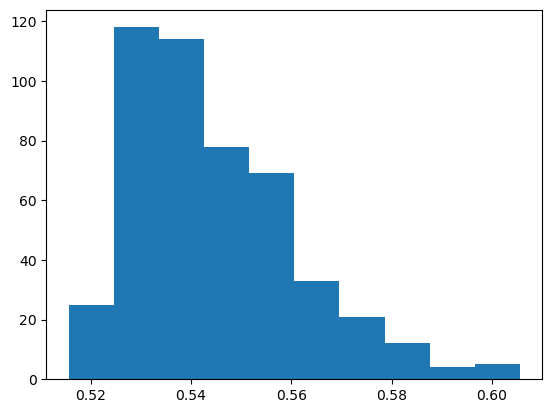

In [69]:
plt.hist(trade_signal["AMZN"])

In [74]:
def simple_backtest(test_data, trade_signal, pct=1, up_pct=1.05, down_pct=0.9):
    final = []
    
    for key, data in test_data.items():
        pos = 0
        take_out_down = 0
        take_out_up = 0
        balance = 10_000

        # print(f"Testing for {key} with initial fund {balance}")
        
        for i, price in enumerate(data):
            if not pos:
                if trade_signal[key][i] > 0.545:
                    # print(f"Bought at time: {i} at price: {int(price)}")
                    pos = balance * pct
                    balance -= pos
                    take_out_down = pos * down_pct
                    take_out_up = pos * up_pct
            else:
                pos *= price/(data[i-1])
                if (pos < take_out_down) or (pos > take_out_up):
                    # print(f"Sold at time: {i} at price: {int(price)}")
                    balance += pos
                    pos = 0
                
        balance += pos
                
        print(f"{key}: {int(balance)}")
        final.append(balance)
    
    average = int(sum(final)/len(final))
    print(average)
    return average
    

In [70]:
avg = 0
for key, data in test_data.items():
    final = data["Close"].iloc[-20]
    begin = data["Close"].iloc[0]
    print(f"{key}: {10000*final/begin}")
    avg += 10000*final/begin

print(avg/6)

AAPL: 10998.80312722462
AMZN: 5444.344810477461
GOOG: 8072.4135124198665
META: 5927.943690986045
MSFT: 9726.123865974785
NVDA: 15032.400863195631
9200.338311713067


In [75]:
up = [1.02 + 0.01 *x for x in range(7)]
down =[0.85 + 0.01*x for x in range(10)]

for up_pct in up:
    for down_pct in down:
        print(up_pct, down_pct)
        s = simple_backtest(test_data_modified, trade_signal, 1, up_pct, down_pct)

1.02 0.85
AAPL: 9910
AMZN: 8189
GOOG: 11709
META: 9332
MSFT: 12281
NVDA: 10356
10296
1.02 0.86
AAPL: 10367
AMZN: 8124
GOOG: 9718
META: 10865
MSFT: 12565
NVDA: 9266
10151
1.02 0.87
AAPL: 8655
AMZN: 6474
GOOG: 9873
META: 8868
MSFT: 13449
NVDA: 9612
9488
1.02 0.88
AAPL: 9490
AMZN: 6365
GOOG: 10870
META: 12469
MSFT: 10224
NVDA: 9960
9896
1.02 0.89
AAPL: 9638
AMZN: 6042
GOOG: 10082
META: 10877
MSFT: 10649
NVDA: 8310
9266
1.02 0.9
AAPL: 11463
AMZN: 5621
GOOG: 10928
META: 12061
MSFT: 8055
NVDA: 8077
9368
1.02 0.9099999999999999
AAPL: 11933
AMZN: 7049
GOOG: 9786
META: 11823
MSFT: 9611
NVDA: 9708
9985
1.02 0.9199999999999999
AAPL: 11399
AMZN: 6321
GOOG: 10608
META: 13360
MSFT: 10693
NVDA: 11543
10654
1.02 0.9299999999999999
AAPL: 13243
AMZN: 8781
GOOG: 9177
META: 13542
MSFT: 10867
NVDA: 12843
11409
1.02 0.94
AAPL: 12144
AMZN: 9773
GOOG: 10150
META: 10094
MSFT: 9010
NVDA: 13103
10712
1.03 0.85
AAPL: 12028
AMZN: 8263
GOOG: 13548
META: 9810
MSFT: 12315
NVDA: 8781
10791
1.03 0.86
AAPL: 12109
AMZN: 

In [48]:
#best 1
# 1.07 0.9199999999999999
# Result for AAPL is :tensor([8240.8613])
# Result for AMZN is :tensor([8289.7969])
# Result for GOOG is :tensor([13604.3232])
# Result for META is :tensor([18456.7930])
# Result for MSFT is :tensor([11073.5498])
# Result for NVDA is :tensor([16028.8262])
# 12615